# Unit 5: Spectral Properties and Quadratic Forms

In this unit:
1. Eigenvalues and eigenvectors
1. Diagnolization and similartiy transform
1. Matrix powers and modes
1. Spectral properties of symmetric matrices
1. Quadratic forms
1. Positive definite (semi-definite) matrices
1. Hessians and convexity

We are now dealing with square matrices $A \in {\mathbb R}^{n \times n}$.

A vector $x \neq 0$ is an eigenvector of $A$ corresponding to a scalar eigenvalue $\lambda$ if
$$
A x = \lambda x
$$

In [2]:
using LinearAlgebra
A = [1 2 ;
    3 4]
λ1, λ2 = eigvals(A)

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014

In [8]:
ev = eigvecs(A)
v1, v2 = ev[:,1], ev[:,2]
norm(A*v1 - λ1*v1), norm(A*v2 - λ2*v2)

(5.551115123125783e-17, 4.440892098500626e-16)

In [6]:
A*v1

2-element Array{Float64,1}:
  0.3069700898055908
 -0.2106246605212121

In [7]:
λ1*v1

2-element Array{Float64,1}:
  0.3069700898055908
 -0.21062466052121215

Eigenvectors are not unique

In [9]:
otherV1 = 2.6*v1
norm(A*otherV1 - λ1*otherV1)

4.965068306494546e-16

In [10]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014
vectors:
2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

#### Finding the eigenvalues and eigenvectors

$$
A x = \lambda x
$$

$$
A x = \lambda I x
$$

$$
(A  - \lambda I) x = 0 
$$

Now if $\lambda$ is an eigenvalue corresponding to an eigenvector $x$, since we can't have $x=0$, we must have that the matrix $A- \lambda I$ is singular. Hence,

$$
\det(A - \lambda I) = 0
$$

Now notice that $\det(A - \lambda I)$ is an $n$th degree polynomial in $\lambda$. Hence we have $n$ eigenvalues.

Back to the example,
$$
A = \left[\begin{matrix}
1 & 2 \\
3 & 4 
\end{matrix}\right].
$$

$$
\det(A - \lambda I) = \left| \begin{matrix}
1-\lambda & 2 \\
3 & 4-\lambda
\end{matrix}\right| = (1-\lambda)(4-\lambda) - 6 =4-4\lambda-\lambda+\lambda^2 - 6 = \lambda^2 - 5\lambda - 2
$$

$$
\lambda_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2a}
$$


In [11]:
a = 1; b=-5; c=-2
λ1, λ2 = (-b + sqrt(b^2-4a*c))/2a, (-b - sqrt(b^2-4a*c))/2a

(5.372281323269014, -0.3722813232690143)

In [12]:
det(A-λ1*I), det(A-λ2*I)

(0.0, 0.0)

In [13]:
v1 = nullspace(A-λ1*I)

2×1 Array{Float64,2}:
 0.41597355791928436
 0.9093767091321241

In [14]:
v2 = nullspace(A-λ2*I)

2×1 Array{Float64,2}:
 -0.8245648401323937
  0.5657674649689923

In [15]:
eigvecs(A)

2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [16]:
norm(v1)

1.0

In [17]:
norm(v2)

1.0

In [19]:
v1'*v2  #not orthogonal

1×1 Array{Float64,2}:
 0.1714985851425088

### More examples

Diagonal matrices are easy

In [20]:
A = Diagonal([1,2,3])

3×3 Diagonal{Int64,Array{Int64,1}}:
 1  ⋅  ⋅
 ⋅  2  ⋅
 ⋅  ⋅  3

$$
P(\lambda) = (1-\lambda)(2-\lambda)(3-\lambda) = a_0 + a_1 t+ a_2 t^2 + a_3 t^3
$$

In [21]:
eigvals(A)

3-element Array{Int64,1}:
 1
 2
 3

Triangular matrices are easy

In [22]:
A = [i*j*(i>=j) for i in 1:3, j in 1:3]

3×3 Array{Int64,2}:
 1  0  0
 2  4  0
 3  6  9

In [23]:
eigvals(A)

3-element Array{Float64,1}:
 1.0
 4.0
 9.0

A singular matrix has $0$ as an eigenvalue

In [24]:
A = [1,2,3]*[10,100,1000]'  #outer product

3×3 Array{Int64,2}:
 10  100  1000
 20  200  2000
 30  300  3000

In [25]:
eigvals(A)

3-element Array{Float64,1}:
    3.777198912278153e-15
    5.6653732023101994e-14
 3210.0

In fact that number of non-zero eigenvalues is the rank.

In [15]:
rank(A)

1

Block triangular matrices:

In [26]:
A1 = [1 2
     3 4]
A2 = [  10 20 100; 
        1 1 1; 
        40 50 60]
A3 = [1 2 3; 
      4 5 6]

A = [A1 A3; zeros(3,2) A2] #block diagonal

5×5 Array{Float64,2}:
 1.0  2.0   1.0   2.0    3.0
 3.0  4.0   4.0   5.0    6.0
 0.0  0.0  10.0  20.0  100.0
 0.0  0.0   1.0   1.0    1.0
 0.0  0.0  40.0  50.0   60.0

In [27]:
eigvals(A)

5-element Array{Float64,1}:
 -32.60861384198509
  -0.3722813232690143
  -0.2067778214712872
   5.372281323269014
 103.81539166345638

In [28]:
eigvals(A1)

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014

In [29]:
eigvals(A2)

3-element Array{Float64,1}:
 -32.60861384198509
  -0.2067778214712872
 103.81539166345638

Eigenvalues can be complex (and so can eigenvectors)

In [32]:
A = [0 -1;
     1 0]  #90 degree rotation matrix

2×2 Array{Int64,2}:
 0  -1
 1   0

$$
\lambda^2 = -1 
$$

In [33]:
eigvals(A)

2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

In [34]:
eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

Eigenvalues of a projection matrix.... do.

In [33]:
using Random
Random.seed!(0)
A = rand(2:5,5,2)
#rank(A)
P = A*inv(A'A)*A'

5×5 Array{Float64,2}:
  0.276316   -0.118421   0.302632   0.302632   0.0526316
 -0.118421    0.907895   0.0131579  0.0131579  0.263158
  0.302632    0.0131579  0.355263   0.355263   0.105263
  0.302632    0.0131579  0.355263   0.355263   0.105263
  0.0526316   0.263158   0.105263   0.105263   0.105263

In [34]:
eigvals(P)

5-element Array{Float64,1}:
 -6.228014526626434e-17
  0.0
  4.067846135427183e-18
  1.0000000000000004
  1.0000000000000007

### Many properties of eigenvalues and eigenvectors

**Claim:** If $A$ has an eigenvalue $\lambda$ and corresponding eigenvector $x$ then $A^2$ has eigenvalue $\lambda^2$ corresponding to that eigenvector

$$
A^2 x = \lambda A x = \lambda^2 x
$$

In [35]:
using Random, LinearAlgebra
Random.seed!(4)
A = rand(3,3)
eigvals(A)

3-element Array{Complex{Float64},1}:
 -0.1705198661005673 - 0.18668249292679936im
 -0.1705198661005673 + 0.18668249292679936im
  2.0897909255556586 + 0.0im

In [36]:
λ1 = eigvals(A)[1]

-0.1705198661005673 - 0.18668249292679936im

In [37]:
eigvals(A^2)

3-element Array{Complex{Float64},1}:
 -0.005773328430409101 - 0.0636661473943958im
 -0.005773328430409101 + 0.0636661473943958im
     4.367226112534777 + 0.0im

In [38]:
λ1^2

-0.005773328430409095 + 0.06366614739439586im

In [39]:
v1 = eigvecs(A)[:,1]

3-element Array{Complex{Float64},1}:
   0.6727300806312084 - 0.0im
  -0.5442416822983804 - 0.23967273627320806im
 -0.24850600854761853 + 0.3633689214366037im

In [40]:
norm(A*v1 - λ1*v1), norm(A^2*v1 - λ1^2*v1), norm(A^9*v1 - λ1^9*v1)

(5.187490351600729e-16, 5.886084766180906e-16, 1.1531591242509943e-13)

**Claim:** If $A$ is non-singular and has an eigenvalue $\lambda$ and corresponding eigenvector $x$ then $A^{-1}$ has eigenvalue $\lambda^{-1}$ corresponding to that eigenvector.

In [41]:
A = [1 2; 3 4];
eigvals(A)

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014

In [42]:
1 ./ eigvals(A)

2-element Array{Float64,1}:
 -2.686140661634507
  0.18614066163450715

In [43]:
eigvals(inv(A))

2-element Array{Float64,1}:
 -2.6861406616345063
  0.18614066163450738

In [44]:
eigvecs(A)

2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [45]:
eigvecs(inv(A))

2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [46]:
eigvecs(inv(A)^4)

2×2 Array{Float64,2}:
 0.415974   0.824565
 0.909377  -0.565767

In [47]:
eigvecs(A^4)

2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

**Claim:** The determinant of a matrix is a product of the eigenvalues.

In [40]:
eigvals(A)

5-element Array{Complex{Float64},1}:
  -0.4428982310429976 + 0.0im
 -0.18952704058228187 - 0.4861390113959593im
 -0.18952704058228187 + 0.4861390113959593im
  0.46463935276142254 + 0.0im
   2.4942385605732396 + 0.0im

In [39]:
using Random, LinearAlgebra
Random.seed!(0)
A = rand(5,5)
@show prod(eigvals(A))
@show det(A);

prod(eigvals(A)) = -0.13974247314357097 - 8.041632571074516e-18im
det(A) = -0.139742473143571


**Claim:** The trace of the matrix (sum of diagonals) is the sum of the eigenvalues.

In [41]:
using Random, LinearAlgebra
Random.seed!(0)
A = rand(5,5)
@show sum(eigvals(A))
@show tr(A);

sum(eigvals(A)) = 2.1369256011271007 + 0.0im
tr(A) = 2.1369256011271034


A = 7
$$
7x = \lambda x
$$

**Claim:** Scaling the matrix scales the eigenvalues.

**Claim**: Adding a multiple of the identity to the matrix adds that to the eigenvectors (and does not change the eigenvalues).

In [42]:
A = [0 -1 ; 1 0]

2×2 Array{Int64,2}:
 0  -1
 1   0

In [43]:
eigvals(A)

2-element Array{Complex{Float64},1}:
 0.0 - 1.0im
 0.0 + 1.0im

In [44]:
eigvals(A + 2I)

2-element Array{Complex{Float64},1}:
 2.0 - 1.0im
 2.0 + 1.0im

In [53]:
eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

In [54]:
eigvecs(A+2I)

2×2 Array{Complex{Float64},2}:
 0.707107-0.0im       0.707107+0.0im
      0.0+0.707107im       0.0-0.707107im

! Note there is no special relationship between eigvals of A, B and AB or A+B

**Claim**: The eigenvalues of $A^T$ are the same as $A$. The eigenvectors are generally different.

In [45]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [46]:
eigvals(A)

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014

In [47]:
eigvals(A')

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014

In [48]:
eigvecs(A)

2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [49]:
eigvecs(A')

2×2 Array{Float64,2}:
 -0.909377  -0.565767
  0.415974  -0.824565

**Claim**: Assume that $A$ and $B$ are two matrices and both the matrix multiplications $AB$ and $BA$ are defined. Then the non-zero eigenvalues of $AB$ and $BA$ agree.

In [51]:
A

4×6 Array{Int64,2}:
  1  1  8  6  3  5
  3  1  6  2  7  4
 10  4  8  3  2  7
  6  9  5  8  9  1

In [52]:
B

6×4 Array{Int64,2}:
 1   4  4   4
 8   5  2   3
 3   2  2   1
 8  10  4   9
 6   2  6  10
 4   2  8   5

In [50]:
using Random, LinearAlgebra
Random.seed!(0)

neat(num) = round(num,digits=4)

A = rand(1:10,4,6)
B = rand(1:10,6,4)

@show size(A*B)
@show size(B*A)
@show neat.(eigvals(A*B))
@show neat.(eigvals(B*A));

size(A * B) = (4, 4)
size(B * A) = (6, 6)
neat.(eigvals(A * B)) = [-28.1014, 3.5817, 30.5888, 550.9309]
neat.(eigvals(B * A)) = [-28.1014, -0.0, 0.0, 3.5817, 30.5888, 550.9309]


# Diagonalization and similarity

Two square matrices $A$ and $\tilde{A}$ are similar if there exists another non-singular matrix $M$ such that
$$
A M = M \tilde{A}
$$

This means:
$$
A = M \tilde{A} M^{-1}
$$
or,
$$
\tilde{A} = M^{-1} A M
$$

**Claim**: Similar matrices share the same eigenvalues.

The most basic way to get a similarity transform is to **diagonalize** the matrix (this is typically possible - but not always):

$$
A v_i = \lambda_i v_i
\qquad
\text{for}
\qquad i=1,\ldots,n.
$$ 
Can be written as,
$$
A~~
\left[\begin{matrix}
\vdots & \vdots && \vdots \\
v_1 & v_2 && v_n \\
\vdots & \vdots && \vdots
\end{matrix}\right]
=
\left[\begin{matrix}
\vdots & \vdots && \vdots \\
v_1 & v_2 && v_n \\
\vdots & \vdots && \vdots
\end{matrix}\right]
\left[\begin{matrix}
\lambda_1 &  &&&  \\
& \lambda_2 &&&  \\
& & \ddots &&\\
& & && \lambda_n
\end{matrix}\right]
$$

But this requires the eigenvectors to be linearly independent.

So the most common $\tilde{A}$ is $\Lambda$, a matrix with the eigenvalues on the diagonal.

In [54]:
A = [1 2 ; 3 4]
M = eigvecs(A) #matrix with eigenvectors in cols

2×2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377

In [56]:
det(M) #not zero - that is good

0.9851843661437781

In [57]:
rank(M)

2

In [58]:
A*M

2×2 Array{Float64,2}:
  0.30697   -2.23473
 -0.210625  -4.88543

In [59]:
M*Diagonal(eigvals(A)) #M times A tilde

2×2 Array{Float64,2}:
  0.30697   -2.23473
 -0.210625  -4.88543

In [60]:
M*Diagonal(eigvals(A))*inv(M)  #this is the diagonalization of A

2×2 Array{Float64,2}:
 1.0  2.0
 3.0  4.0

### Taking powers

$$
A^k = (M \tilde{A} M^{-1})^k = M \tilde{A}^k M^{-1}
$$

In [64]:
A

2×2 Array{Int64,2}:
 1  2
 3  4

In [62]:
A^20

2×2 Array{Int64,2}:
  95799031216999  139620104992450
 209430157488675  305229188705674

In [63]:
Float64.(A^20) #cast (or change type) to Float64

2×2 Array{Float64,2}:
 9.5799e13  1.3962e14
 2.0943e14  3.05229e14

In [65]:
M*Diagonal(eigvals(A).^20)*inv(M)   #notice the .^ to raise each eigval to 20

2×2 Array{Float64,2}:
 9.5799e13  1.3962e14
 2.0943e14  3.05229e14

Dynamical System Example - Fibonacci

In [66]:
A = [1 1;
    1 0]
eigvals(A) #look up wiki for relation to golden ratio

2-element Array{Float64,1}:
 -0.6180339887498948
  1.618033988749895

In [67]:
x = [1,0] #current and previous
for n in 1:15
    println("Fib $(n):", x[1]) #x[1] is first coordinate of vector x
    x = A*x #dynamical system evolution...
end

Fib 1:1
Fib 2:1
Fib 3:2
Fib 4:3
Fib 5:5
Fib 6:8
Fib 7:13
Fib 8:21
Fib 9:34
Fib 10:55
Fib 11:89
Fib 12:144
Fib 13:233
Fib 14:377
Fib 15:610


In [68]:
Λ = Diagonal(eigvals(A))  #\Lambda + [TAB]

2×2 Diagonal{Float64,Array{Float64,1}}:
 -0.618034   ⋅ 
   ⋅        1.61803

In [69]:
M = eigvecs(A);
Mi = inv(M)

2×2 Array{Float64,2}:
  0.525731  -0.850651
 -0.850651  -0.525731

In [70]:
fib(n) = ((M*Λ^(n-1)*Mi)*[1,0])[1]  #computes the (n-1) matrix power of A times initial condition 

fib (generic function with 1 method)

In [71]:
for n in 1:15
    println("Fib $(n):", fib(n))
end

Fib 1:1.0
Fib 2:1.0000000000000004
Fib 3:2.0
Fib 4:3.0000000000000004
Fib 5:5.0
Fib 6:8.000000000000002
Fib 7:13.000000000000004
Fib 8:21.000000000000004
Fib 9:34.00000000000001
Fib 10:55.00000000000001
Fib 11:89.00000000000001
Fib 12:144.00000000000003
Fib 13:233.00000000000003
Fib 14:377.00000000000006
Fib 15:610.0


Dynamical System Example [SWJ] Listing 1.8 - Markov chains.

In [116]:
using LinearAlgebra, StatsBase

# Transition probability matrix
P = [0.5 0.4 0.1;
     0.3 0.2 0.5;
     0.5 0.3 0.2]

# First way
piProb1 = (P^100)[1,:]

# Second way
A = vcat((P' - I)[1:2,:],ones(3)')
b = [0 0 1]'
piProb2 = A\b

# Third way
eigVecs = eigvecs(copy(P'))
highestVec = eigVecs[:,findmax(abs.(eigvals(P)))[2]]
piProb3 = Array{Float64}(highestVec)/norm(highestVec,1)

# Fourth way
numInState = zeros(Int,3)
state = 1
N = 10^6
for t in 1:N
    numInState[state] += 1
    global state = sample(1:3,weights(P[state,:]))
end
piProb4 = numInState/N

display([piProb1 piProb2 piProb3 piProb4])

3×4 Array{Float64,2}:
 0.4375  0.4375  0.4375  0.437143
 0.3125  0.3125  0.3125  0.313107
 0.25    0.25    0.25    0.24975

Non-diagonalizable example

In [72]:
A = [1 1;
     0 1] #Sheer

2×2 Array{Int64,2}:
 1  1
 0  1

In [73]:
eigvals(A)

2-element Array{Float64,1}:
 1.0
 1.0

In [74]:
eigvecs(A)

2×2 Array{Float64,2}:
 1.0  -1.0
 0.0   2.22045e-16

The nullspace of $A-\lambda I$ is one dimensional even though the $\lambda$ eigenvalue is repeated. In this case (and such cases) $A$ is not diagonalizable. Still we can use the Jordan canonical form.

# Symmetric Matrices

In [87]:
using Random
Random.seed!(1)
A = rand(5,5) #not symmetric (most probably - it isn't)
ev = eigvals(A)

5-element Array{Complex{Float64},1}:
 -0.09420893656907516 - 0.5748258949280622im
 -0.09420893656907516 + 0.5748258949280622im
  0.09987497487936095 + 0.0im
   0.2506206254622237 + 0.0im
   2.4896039538513364 + 0.0im

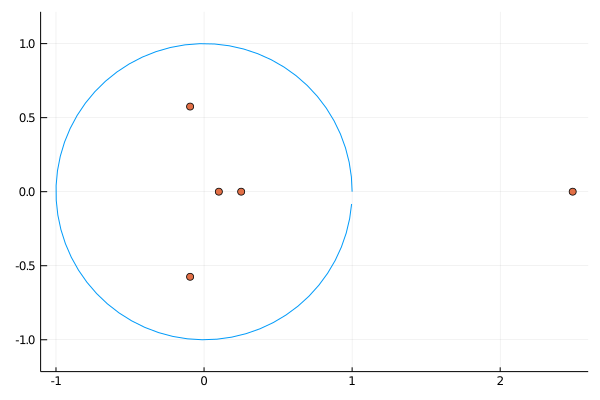

In [88]:
using Plots
plot(cos.(0:0.1:2π),sin.(0:0.1:2π)) #plot unit circle
scatter!(real.(ev),imag.(ev),legend=false,aspectratio=1)

In [98]:
using Random
Random.seed!(2)
Atemp = rand(5,5)
A = (Atemp + Atemp')/2 #symmetrizing a matrix

5×5 Array{Float64,2}:
 0.366796  0.541617  0.177046   0.530798   0.319901
 0.541617  0.523559  0.550503   0.625737   0.453131
 0.177046  0.550503  0.0271377  0.594421   0.805314
 0.530798  0.625737  0.594421   0.751799   0.0871765
 0.319901  0.453131  0.805314   0.0871765  0.0938589

In [99]:
ev = eigvals(A)

5-element Array{Float64,1}:
 -0.8756448268499849
 -0.16973651331112244
  0.0983985761854665
  0.42177022432563593
  2.2883642954147607

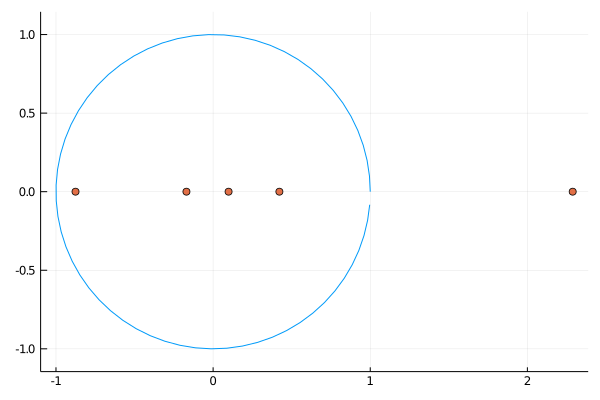

In [100]:
using Plots
plot(cos.(0:0.1:2π),sin.(0:0.1:2π)) #plot unit circle
scatter!(real.(ev),imag.(ev),legend=false,aspectratio=1)

In [101]:
M = eigvecs(A)

5×5 Array{Float64,2}:
 -0.18844     0.422341   0.760236    0.237231   -0.38972
  0.0301479  -0.819812   0.214882   -0.0684302  -0.525493
 -0.712839    0.177443  -0.369921   -0.384803   -0.418878
  0.277274    0.170737  -0.488704    0.611782   -0.529962
  0.615272    0.298159   0.0139636  -0.645514   -0.340085

In [102]:
M*M' #shows you that M' is inverse of M

5×5 Array{Float64,2}:
  1.0          1.61269e-16   1.02949e-16  -2.21236e-16  1.32401e-16
  1.61269e-16  1.0           1.52257e-16   1.26331e-16  3.87842e-17
  1.02949e-16  1.52257e-16   1.0          -8.54132e-17  1.02279e-16
 -2.21236e-16  1.26331e-16  -8.54132e-17   1.0          9.88576e-17
  1.32401e-16  3.87842e-17   1.02279e-16   9.88576e-17  1.0

In [103]:
M' - inv(M)

5×5 Array{Float64,2}:
 -5.55112e-17  -6.93889e-17   0.0          -1.11022e-16   0.0
 -1.66533e-16   3.33067e-16  -2.77556e-17  -3.05311e-16   1.11022e-16
  0.0          -5.55112e-17   1.66533e-16   1.66533e-16   2.77556e-17
 -2.498e-16     5.55112e-17  -1.66533e-16  -3.33067e-16  -1.11022e-16
  0.0          -1.11022e-16  -1.11022e-16   3.33067e-16  -2.22045e-16

In [104]:
norm(M' - inv(M)) #matrix norm... 

8.519876736429637e-16

**Claim:** For symmetric matrices:

1. The eigenvalues are real.
1. There exist an orthonormal set of eigenvectors.

Hence symmetric matrices are always diagonalizable (and much more)...

Hence for symmetric matrices,
$$
S = Q \Lambda Q^T = \sum_{i=1}^n \lambda_i q_i q_i^T
$$

In [105]:
using Random, Distributions
Random.seed!(0)
#generate synthetic data of length 3 from Multi-variate normal distribution
data = [ rand(MvNormal([10,0,20], [ 1 0.9 0.7;   
                                    0.9 1 0.4; 
                                    0.7 0.4 1]))    for _ in 1:10^4]

10000-element Array{Array{Float64,1},1}:
 [10.679107426035777, 0.9722937489749814, 19.86838118098579]
 [9.865146128069478, 0.13433196995064864, 19.73915605206537]
 [10.064947548548343, 0.010933217227481605, 19.85553531352862]
 [11.57433020213699, 1.116609526755583, 21.09845583719514]
 [10.397482409218163, 0.7115153187055003, 19.683301278772777]
 [9.81242731805484, -0.8694022030746065, 19.522954656705295]
 [12.276232832784524, 2.144371711863469, 21.421070681052207]
 [9.398746405814617, -0.04322147847357338, 18.93374873183504]
 [10.279466252089899, 0.3000872103729729, 19.964611006238844]
 [10.47371432214933, 0.5572118255381628, 19.806159320553043]
 [11.423048580664318, 1.4587554090989188, 21.063906384125172]
 [9.703722302890924, 0.03459825748010964, 19.671857783111914]
 [9.943070123901043, -0.8232081981688787, 21.660090385468713]
 ⋮
 [10.213197525273289, -0.012644470602219682, 20.294349942048207]
 [9.36896250281594, -0.11925411683267723, 18.541168142363755]
 [10.305178234631503, 0.581336

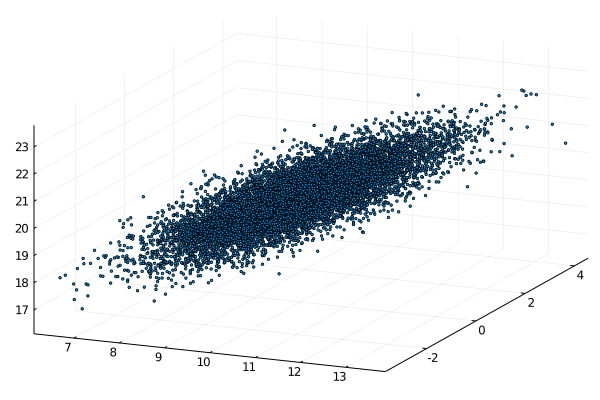

In [106]:
using Plots
scatter((x->x[1]).(data),(x->x[2]).(data),(x->x[3]).(data),legend=false,ms=1.5,camera=(30,50))

In [107]:
Σhat = cov(data) #compute the sample covariance from the data... \Sigma + [Tab]
#.... for data science this is sometimes where the story starts...

3×3 Array{Float64,2}:
 0.98347   0.885829  0.681939
 0.885829  0.991512  0.382662
 0.681939  0.382662  0.981312

In [108]:
ev = eigvals(Σhat) #always positive because postive definite

3-element Array{Float64,1}:
 0.030901127272366945
 0.6183928695087877
 2.306999375007394

In [109]:
Q = eigvecs(Σhat) #before was M

3×3 Array{Float64,2}:
  0.757133  -0.105388  -0.644704
 -0.573817  -0.578978  -0.57924
 -0.312224   0.808503  -0.498837

In [110]:
Q*Q'

3×3 Array{Float64,2}:
  1.0          -5.55112e-17  -5.55112e-17
 -5.55112e-17   1.0           5.55112e-17
 -5.55112e-17   5.55112e-17   1.0

In [111]:
p = sortperm(ev,rev=true) #gives me order of eigenvalues by magnitude

3-element Array{Int64,1}:
 3
 2
 1

In [112]:
sev = ev[p] #reshuffle eigenvalues
sQ = Q[:,p] #resuhuffle eigenvectors (both according to permuatation)
sev

3-element Array{Float64,1}:
 2.306999375007394
 0.6183928695087877
 0.030901127272366945

In [114]:
approx1 = sev[1]*sQ[:,1]*sQ[:,1]' #rank 1 approximation

3×3 Array{Float64,2}:
 0.958888  0.861522  0.741936
 0.861522  0.774042  0.666599
 0.741936  0.666599  0.57407

In [115]:
rank(approx1)

1

In [117]:
Σhat

3×3 Array{Float64,2}:
 0.98347   0.885829  0.681939
 0.885829  0.991512  0.382662
 0.681939  0.382662  0.981312

In [116]:
norm(approx1-Σhat)

0.61916445370032

In [118]:
approx2 = sev[1]*sQ[:,1]*sQ[:,1]' + sev[2]*sQ[:,2]*sQ[:,2]'

3×3 Array{Float64,2}:
 0.965756  0.899254  0.689244
 0.899254  0.981337  0.377126
 0.689244  0.377126  0.978299

In [119]:
norm(approx2-Σhat) #matrix norm

0.030901127272366925

In [120]:
approx3 = sev[1]*sQ[:,1]*sQ[:,1]' + sev[2]*sQ[:,2]*sQ[:,2]' + sev[3]*sQ[:,3]*sQ[:,3]' #exact

3×3 Array{Float64,2}:
 0.98347   0.885829  0.681939
 0.885829  0.991512  0.382662
 0.681939  0.382662  0.981312

In [122]:
norm(approx3-Σhat) #exact match

2.3992122494236667e-15

## Positive definite matrices

In [32]:
randS() = begin A = rand(-1:4,2,2); A+A' end
randS()

2×2 Array{Int64,2}:
 -2  4
  4  0

In [33]:
f(x,y) = [x,y]'*S*[x,y]

f (generic function with 1 method)

In [34]:
S = randS()

2×2 Array{Int64,2}:
 -2  3
  3  0

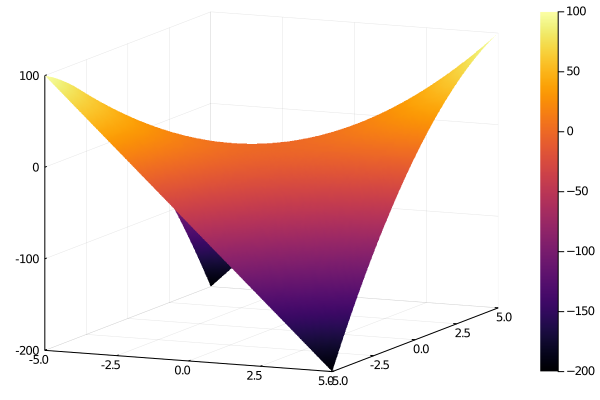

In [35]:
using Plots
grid = -5:0.1:5;
z = [f(x,y) for x in grid, y in grid]
surface(grid,grid,z)

**What is a positive definite matrix?**

Criterion 1 (eigenvalues) : All eigenvalues are positive.

Criterion 2 (energy): For any $x\neq 0$, $x^TSx > 0$.

Criterion 3 (Gram): $S= A^T A$ for matrix with independent columns.

Criterion 4 (Sylvester): All the leading determinants are positive.

Criterion 5 (elimination): All pivots are positive.

## Hessian

$$
f: {\mathbb R}^n \to {\mathbb R}
$$

$$
\mathbf{H} f=\left[\begin{array}{cccc}\frac{\partial^{2} f}{\partial x_{1}^{2}} & \frac{\partial^{2} f}{\partial x_{1} \partial x_{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{1} \partial x_{n}} \\ \frac{\partial^{2} f}{\partial x_{2} \partial x_{1}} & \frac{\partial^{2} f}{\partial x_{2}^{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{2} \partial x_{n}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial^{2} f}{\partial x_{n} \partial x_{1}} & \frac{\partial^{2} f}{\partial x_{n} \partial x_{2}} & \cdots & \frac{\partial^{2} f}{\partial x_{n}^{2}}\end{array}\right],
$$

It is the Jacobian of the gradient.

$$
y=f(\mathbf{x}+\Delta \mathbf{x}) \approx f(\mathbf{x})+\nabla f(\mathbf{x}) \Delta \mathbf{x}+\frac{1}{2} 
\Delta \mathbf{x}^{\mathrm{T}} \mathbf{H}(\mathbf{x}) \Delta \mathbf{x}
$$


## Covariance


## Jordan Canonical Form

## Matrix Exponentials and differential equations